In [91]:
cd C:\Users\szdxl\OneDrive\Duke Assigment\Job Seeking\Collection_DS_takehome_challenges\data\Pricing_Test

C:\Users\szdxl\OneDrive\Duke Assigment\Job Seeking\Collection_DS_takehome_challenges\data\Pricing_Test


# Data Loading

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
user_table=pd.read_csv('user_table.csv')
test_result=pd.read_csv('test_results.csv')

In [10]:
user_table[user_table['city']=='Reno'].head()
#it seems the lat and long reflects city's location

,user_id,city,country,lat,long
1,89568,Reno,USA,39.54,-119.82
726,638438,Reno,USA,39.54,-119.82
1054,360205,Reno,USA,39.54,-119.82
1128,613161,Reno,USA,39.54,-119.82
1452,388036,Reno,USA,39.54,-119.82


In [11]:
test_result.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0


# Data Processing and Cleaning

In [12]:
#check uniqueness
print('test_result:\t', test_result['user_id'].nunique())
print('user_table:\t', user_table['user_id'].nunique())
#different unique, use left join

test_result:	 316800
user_table:	 275616


In [13]:
data=pd.merge(left=test_result, right=user_table, how='left', on='user_id')
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [14]:
data.isnull().sum()
#so as expected there are some null data

user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41184
country             41184
lat                 41184
long                41184
dtype: int64

In [15]:
#let's check the test
data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price         
0    39      202517
     59         210
1    39         155
     59      113918

**It seems there are somethign wrong here.**

*People in test should have a price 59 while people not in test should have price 39*

*But there are just a small amount of wrong price so let's just get rid of them*


In [16]:
data=data[((data['test']==0) & (data['price']==39)) | ((data['test']==1) & (data['price']==59))]
data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()
#Ok Good Job.

,,user_id
test,price,
0,39,202517
1,59,113918


In [17]:
data['revenue']=data['converted']*data['price']
data.head(20)
#Create new columns named 'revenue' for further research

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94,0
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1,East Orange,USA,40.77,-74.21,59
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0,Dayton,USA,39.78,-84.20,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0,Richmond,USA,37.53,-77.47,0


# EDA

*Use EDA to check if the test is trully random or not*

In [18]:
source_pic=data.groupby('test')['source'].apply(lambda x: x.value_counts(normalize=True)).unstack()
source_pic
#normalize here calculated the cell/total (within each test category)

,ads-bing,ads-google,ads-yahoo,ads_facebook,ads_other,direct_traffic,friend_referral,seo-bing,seo-google,seo-other,seo-yahoo,seo_facebook
test,,,,,,,,,,,,
0,0.072014,0.186873,0.023761,0.168253,0.095083,0.191154,0.064790,0.006562,0.074502,0.029030,0.021509,0.066468
1,0.072394,0.188706,0.024219,0.169253,0.092786,0.189259,0.066337,0.007154,0.070753,0.029539,0.021814,0.067786


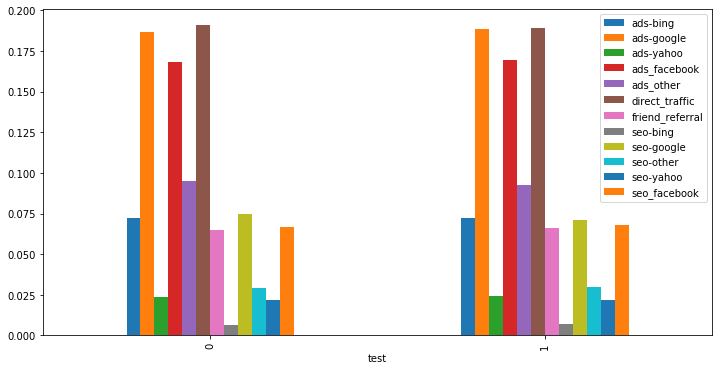

In [19]:
fig, ax= plt.subplots(figsize=(12,6))
source_pic.plot(kind='bar', ax=ax)
plt.show()

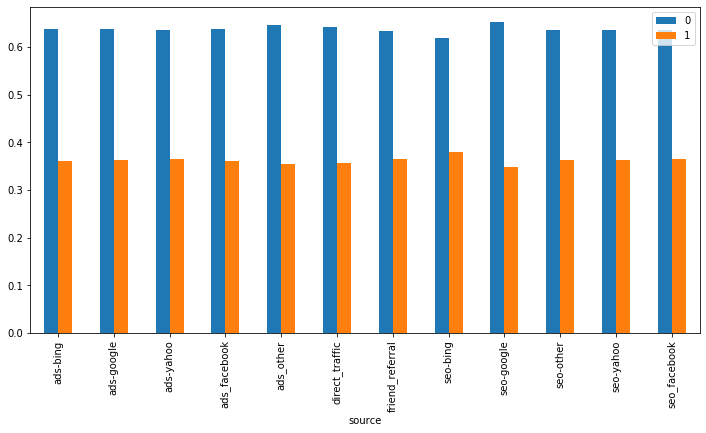

In [20]:
fig, ax= plt.subplots(figsize=(12,6))
tmp=data.groupby('source')['test'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp.plot(kind='bar', ax=ax)
plt.show()

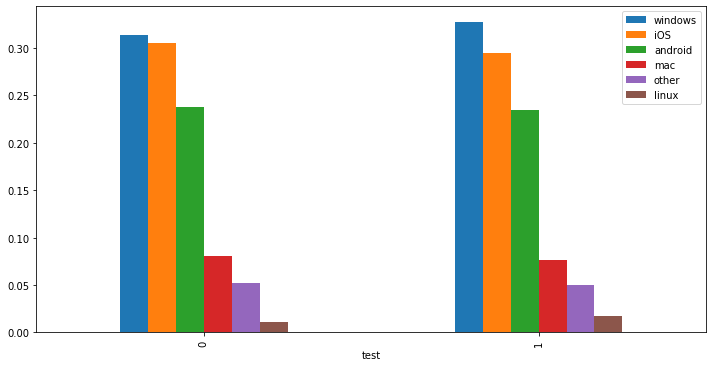

In [21]:
OS_data=data.groupby('test')['operative_system'].apply(lambda x: x.value_counts(normalize=True)).unstack()
fig, ax= plt.subplots(figsize=(12,6))
OS_data.plot(kind='bar', ax=ax)
plt.show()

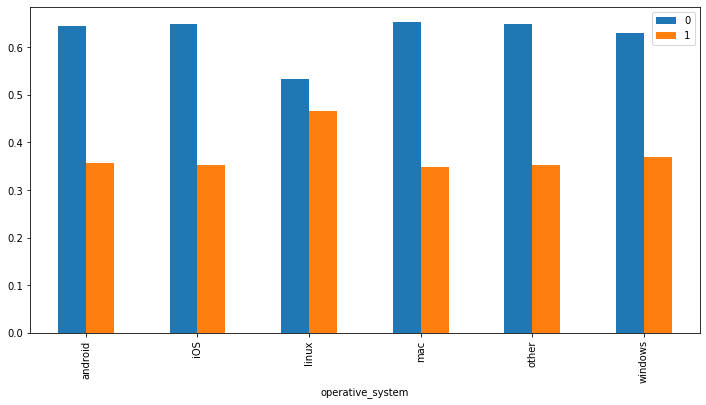

In [22]:
OS_data=data.groupby('operative_system')['test'].apply(lambda x: x.value_counts(normalize=True)).unstack()
fig, ax= plt.subplots(figsize=(12,6))
OS_data.plot(kind='bar', ax=ax)
plt.show()

**It seems between test 0 and 1 the normalization is not strict, for example: Linux**

**Let's take a deeper look**

# So we can see some fluctuation here.

# Let's use Chi-square to test

In [23]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [24]:
data2=data.copy()

In [25]:
label_encoder1=LabelEncoder()
label_encoder2=LabelEncoder()
label_encoder3=LabelEncoder()

data2['source']=label_encoder1.fit_transform(data.source)
data2['device']=label_encoder1.fit_transform(data.device)
data2['operative_system']=label_encoder1.fit_transform(data['operative_system'])


Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [26]:
ch2values, p_value=chi2(data2[['source', 'device', 'operative_system']], data['test'])
pd.DataFrame({'chi2_value': ch2values, 'pvalue': p_value}, index=['source', 'device', 'OS']).sort_values(by='pvalue')

,chi2_value,pvalue
OS,83.937937,5.105534e-20
device,44.785346,2.198620e-11
source,0.918060,3.379849e-01


**Accordingly, the null hypothesis is rejected, which means the the split is not random and OS/device is more correlated with the split**

# In conclusion, according to the EDA and chi square test, the split is not random, keep that in mind and continue to deal with the questions

# Q1

In [27]:
data[['test', 'revenue']].groupby(by='test').mean()

,revenue
test,
0,0.776083
1,0.917748


**According to the result it's clear that the average revenue for the 'test' group is higher**

**But obviously the evidence is not solid. We need to do t-test to see if there are statistically differences between the two mean**

In [28]:
from scipy.stats import ttest_ind

In [29]:
test_revenue=data[data['test']==1]['revenue']
ctr_revenue=data[data['test']==0]['revenue']
t_test_result=ttest_ind(test_revenue, ctr_revenue, axis=0, equal_var=False).pvalue/2
#because H0 is: test_mean > ctrl_mean, one tail
print(t_test_result)

5.486288656210391e-09


# Conclusion for Q1

**The p-value is much smaller then the usual threshold 5%, but we can't just conclude the revenue is statistically different because:**

**According to the research, the group is not randomly formed and so the test result it not solid**

# Q2: Conversition Rate

**Let's first get a overall thinking**

In [31]:
data2.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,3,0,1,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,8,0,0,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,0,0,0,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,5,0,1,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,3,1,3,0,39,0,Fishers,USA,39.95,-86.02,0


In [39]:
ch2value, pvalue=chi2(data2[['source','device', 'operative_system','price' ]], data2['converted'])
pd.DataFrame({'ch2': ch2value, 'pvalue': pvalue}, index= ['source','device', 'operative_system','price' ]).sort_values(by='pvalue')

,ch2,pvalue
price,152.509801,4.902372e-35
operative_system,7.378510,6.600782e-03
source,2.451427,1.174181e-01
device,0.706940,4.004615e-01


**The result tells us price and operative_system are the majot facts**

**Let's take a deeper look into these two**

**1. Price**

In [56]:
price_data=data.groupby('price')['converted'].mean().reset_index()
price_data

,price,converted
0,39,0.019900
1,59,0.015555


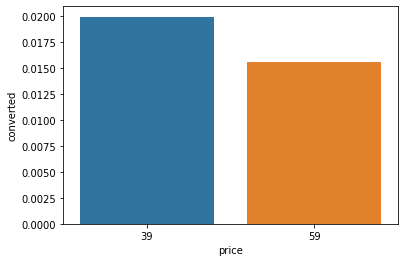

In [57]:
sns.barplot(x='price', y='converted', data=price_data)

**2.Operative_system**

In [67]:
operation_data=data.groupby('operative_system')['converted'].mean().reset_index()
operation_data

,operative_system,converted
0,android,0.014919
1,iOS,0.022328
2,linux,0.008232
3,mac,0.023987
4,other,0.012981
5,windows,0.016966


Text(0.5, 1.0, 'Conversion Rate - Operative System')

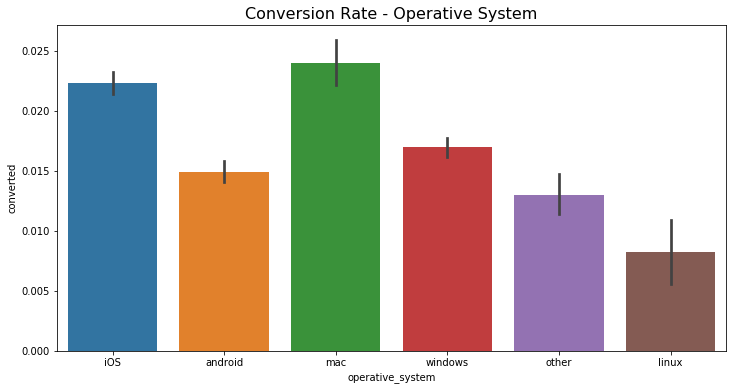

In [79]:
fig, ax=plt.subplots(figsize=(12, 6))
sns.barplot(x='operative_system', y= 'converted', data=data, ax=ax)
ax.set_title('Conversion Rate - Operative System', fontsize=16)

Text(0.5, 1.0, 'Conversion Rate - Operative System')

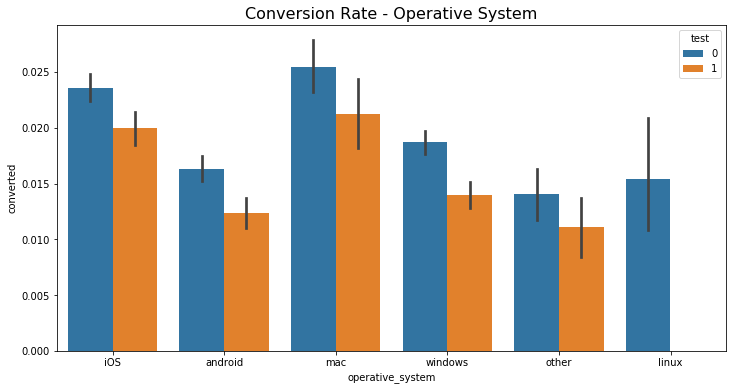

In [83]:
fig, ax=plt.subplots(figsize=(12, 6))
sns.barplot(x='operative_system', y= 'converted', hue='test', data=data, ax=ax)
ax.set_title('Conversion Rate - Operative System', fontsize=16)

**Let's look at source**

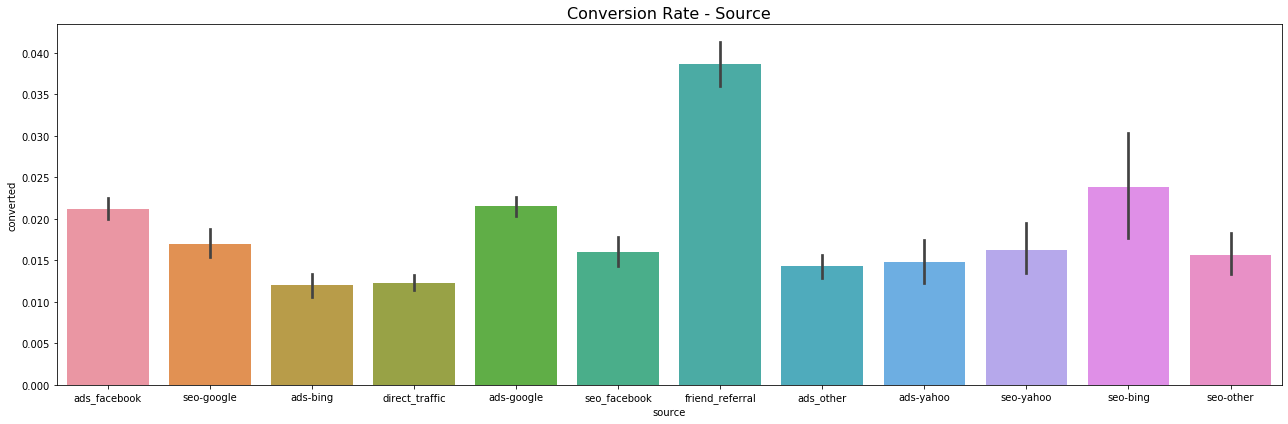

In [89]:
fig, ax=plt.subplots(figsize=(18, 6))
sns.barplot(x='source', y= 'converted', data=data, ax=ax)
ax.set_title('Conversion Rate - Source', fontsize=16)
plt.tight_layout()

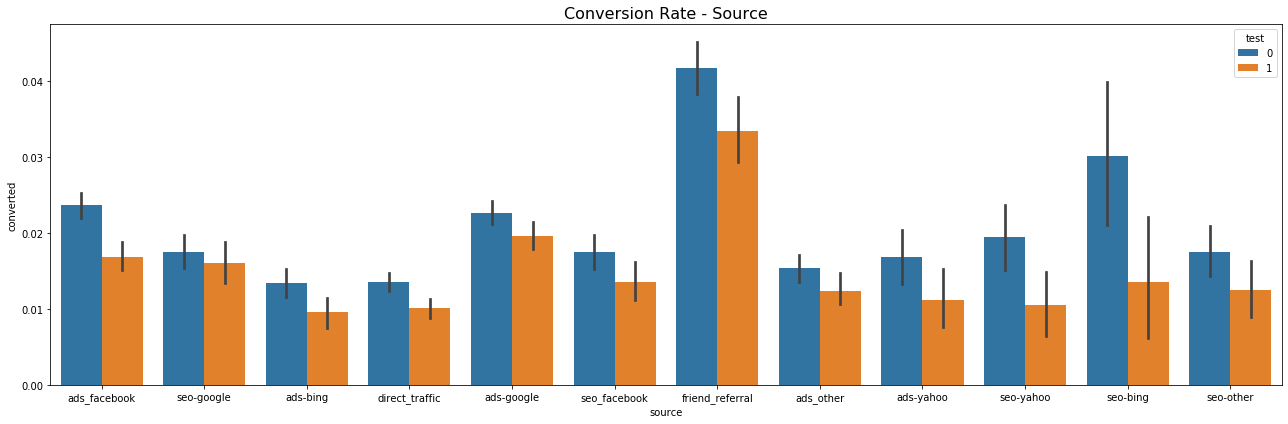

In [90]:
fig, ax=plt.subplots(figsize=(18, 6))
sns.barplot(x='source', y= 'converted', hue='test', data=data, ax=ax)
ax.set_title('Conversion Rate - Source', fontsize=16)
plt.tight_layout()

**Interesting, a friend_referral source can largely increase conversion rate**

# In conclusion

**Lower price leads to higher price**

**IOS and Mac users have higher conversion rate**

**Friend_Referral can help**

# Actionable Insight:

**Launch special event to mac and IOS user**

**Launch event to reward friend invite**

**Establish a team to work on Linux OS and find out the reason why Linux users have low conversion rate**